# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.


# From the perspective of Motivate (the operator or owner of the business)
1.	Question 1: What is the utility of each site?
I believe the business is designed that there are fixed sites/locations where the bikes could be rented from and delivered to. At the start of each day there should be a specific number of bikes available at each site. The decision of allocating how many bikes to each site will be driven by the rate each site is being used as starting point and as ending point as well. Customer satisfaction will depend on the availability of bikes at the targeted site when needed. Business ROI –return on investment-will depend on using the least number of bikes to satisfy customer needs.  That is, not allocating too many bikes for a site that is not that much been used by customers and meanwhile making sure that heavily used sites have always enough amounts of bikes. To calculate that I will need to know:
a.	I will need to calculate site utility as = number of bikes available at site/number of bikes at that site at the start of the day
b.	I can set a “utility alert” whenever the utility at site is <10%
c.	I can also set an “idle-site alert” if the average utility is (say) 75%
Knowing the real-time utility will allow me to move bikes from one site to the other to meet customer needs.

2. Question 2: is there a pattern in the way customers use the service? for example, are there a repetition or association of specific starting points and corresponding ending points? This will also help in allocating the bikes and improving the service.
Which sites are used more as starting points and which sites are used more as ending points.

# From the customers’ perspective
3.	Question 3: Are there available bikes at site all the time? Or at least when needed.


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [29]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [30]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [31]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        duration = float(datum)/60
    elif city == 'Chicago':
        duration = float(datum)/60
    elif city == 'Washington':
        duration = (float(datum)/1000)/60
            
    return duration
    

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.

example_trips = {'NYC':839, 'Chicago':926, 'Washington':427387}

tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [32]:
from datetime import datetime
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
       
    # YOUR CODE HERE
    
    if city == 'NYC':
        month = int(datetime.strptime( datum, "%m/%d/%Y %H:%M:%S" ).strftime('%m'))
        hour = int(datetime.strptime( datum, "%m/%d/%Y %H:%M:%S" ).strftime('%H'))
        day_of_week = datetime.strptime( datum, "%m/%d/%Y %H:%M:%S" ).strftime('%A')
       
    elif city == 'Chicago' or city == 'Washington':
        month = int(datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%m'))
        hour = int(datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%H'))
        day_of_week = datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%A')
        
           
    return (month, hour, day_of_week)
'''Reference: I found a hint in: https://stackoverflow.com/questions/16766643/convert-date-string-to-day-of-week'''



# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.

example_trips = {'NYC':'1/1/2016 00:09:55',
                 'Chicago':'3/31/2016 23:30', 
                 'Washington':'3/31/2016 22:57'}


tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [33]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    """Washington divides its users into two types: 'Registered' and 'Casual'. 
    The New York and Chicago data uses 'Subscriber' and 'Customer'."""
    
    # YOUR CODE HERE
    if datum == 'Registered':
        user_type = 'Subscriber'
    elif datum == 'Casual':
        user_type = 'Customer'
    else:
        user_type = datum
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.

example_trips = {'NYC':'Customer',
                 'Chicago':'Subscriber', 
                 'Washington':'Registered'}

tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [34]:
import csv 
from datetime import datetime
from pprint import pprint

def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

       
        
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
                        
            new_point = {}
            
                             
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
  
            
            if city=='NYC':
                new_point['duration'] = duration_in_mins(row['tripduration'], 'NYC')
                new_point['month'] = time_of_trip(row['starttime'], 'NYC')[0]
                new_point['hour'] = time_of_trip(row['starttime'], 'NYC')[1]
                new_point['day_of_week'] = time_of_trip(row['starttime'], 'NYC')[2]
                new_point['user_type'] = type_of_user(row['usertype'], 'NYC')
            
            elif city=='Chicago':
                new_point['duration'] = duration_in_mins(row['tripduration'], 'Chicago')
                new_point['month'] = time_of_trip(row['starttime'], 'Chicago')[0]
                new_point['hour'] = time_of_trip(row['starttime'], 'Chicago')[1]
                new_point['day_of_week'] = time_of_trip(row['starttime'], 'Chicago')[2]
                new_point['user_type'] = type_of_user(row['usertype'], 'Chicago')
            
            elif city=='Washington':
                new_point['duration'] = duration_in_mins(row['Duration (ms)'], 'Washington')
                new_point['month'] = time_of_trip(row['Start date'], 'Washington')[0] 
                new_point['hour'] = time_of_trip(row['Start date'], 'Washington')[1]
                new_point['day_of_week'] = time_of_trip(row['Start date'], 'Washington')[2]
                new_point['user_type'] = type_of_user(row['Member Type'], 'Washington')
            
            else: 
                return 'unidentified city'
            
          

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            f_out.write("{},".format(new_point['duration']))
            f_out.write("{},".format(new_point['month']))
            f_out.write("{},".format(new_point['hour']))
            f_out.write("{},".format(new_point['day_of_week']))
            f_out.write("{},\n".format(new_point['user_type']))
            
  

In [35]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber'),
             (None, [''])])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber'),
             (None, [''])])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer'),
             (None, [''])])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
New York has the highest number of trips and the highest percentage of trips made by subscribers.
Chicago has the highest percentage of trips made by casual customers.


In [42]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        n_unidentified = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            elif row['user_type'] == 'Customer' :
                n_customers += 1
            else:
                n_unidentified += 1
        
        # compute total number of rides
        # n_total will indicate the highst number of trips in general
        n_total = n_subscribers + n_customers + n_unidentified
        
        # Percentage of subscribers
        Per_subscriber = round((n_subscribers/n_total) * 100,2)
       
        # Round all percentages to only two decimals to improve appearance 
        # Percentage of customers
        Per_customers = round((n_customers/n_total) * 100,2)
        # Percentage of unidentified clients (missing data)
        # The question did not ask to print this portion out
        Per_unidentified = round((n_unidentified/n_total) * 100, 2)

        
        
        # return tallies as a tuple
        return(n_total, Per_subscriber, Per_customers)

In [43]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

Washington = './data/Washington-2016-Summary.csv'
Chicago = './data/Chicago-2016-Summary.csv'
NYC = './data/NYC-2016-Summary.csv'


print("Washington \n", number_of_trips(Washington))
print("Chicago \n", number_of_trips(Chicago))
print("NYC \n", number_of_trips(NYC))



Washington 
 (66326, 78.03, 21.97)
Chicago 
 (72131, 76.23, 23.77)
NYC 
 (276798, 88.84, 10.91)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. 
What is the average trip length for each city? 
What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
for Washington
Average trip duration = 18.933 min, Percentage of trips longer than 30 min = 10.84%
for Chicago
Average trip duration = 16.564 min, Percentage of trips longer than 30 min = 8.33%
for NYC
Average trip duration = 15.813 min, Percentage of trips longer than 30 min = 7.30%


In [61]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

# Defining a function for collecting the needed information

def trip_data(city_file):
    # following steps described above for opening the data source file
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        total_durations = 0
        number_of_trips = 0
        long_trips = 0 #this is for the trips longer than 30 min
        
        for row in reader:
            number_of_trips += 1
            trip_duration = float(row['duration'])
            total_durations = total_durations + trip_duration
            
            if trip_duration > 30:
                long_trips +=1
        
        AVG_trip_length = round((total_durations/number_of_trips),3) #Average trip length rounded to three decimals
        Percentage_Long_Trips = round((long_trips/number_of_trips) * 100 , 2)
        
        return (AVG_trip_length, Percentage_Long_Trips)




In [65]:
cities = {'Washington':'./data/Washington-2016-Summary.csv', 
          'Chicago':'./data/Chicago-2016-Summary.csv',
          'NYC':'./data/NYC-2016-Summary.csv'}

for city in cities:
    city_file = cities[city] 
    print(city)
    print ("Average trip duration = {} min, Percentage of trips longer than 30 min = {}".format(trip_data(city_file)[0], trip_data(city_file)[1]))



Washington
Average trip duration = 18.933 min, Percentage of trips longer than 30 min = 10.84
Chicago
Average trip duration = 16.564 min, Percentage of trips longer than 30 min = 8.33
NYC
Average trip duration = 15.813 min, Percentage of trips longer than 30 min = 7.3


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
In Washington
Average trip duration for Subscriber = 12.5 min, Average trip duration for Customers = 41.7 min
In Chicago
Average trip duration for Subscriber = 12.1 min, Average trip duration for Customers = 31.0 min
In NYC
Average trip duration for Subscriber = 13.7 min, Average trip duration for Customers = 33.0 min

Customers, in general, have longer trip average than Subscribers.

In [73]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def trip_usertype(city_file):
    # following steps described above for opening the data source file
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        Subscriber_trips = 0
        Subscriber_total_durations = 0
        Customer_trips = 0
        Customer_total_durations = 0
        
               
        for row in reader:
            user_type = row['user_type']
            if user_type == "Subscriber":
                Subscriber_trips += 1
                Subscriber_trip_duration = float(row['duration'])
                Subscriber_total_durations = Subscriber_trip_duration + Subscriber_total_durations
        
            elif user_type == "Customer":
                Customer_trips += 1
                Customer_trip_duration = float(row['duration'])
                Customer_total_durations = Customer_trip_duration + Customer_total_durations
        
        AVG_trip_length_Subscriber = round((Subscriber_total_durations/Subscriber_trips),1) #Average trip length rounded to one decimal
        AVG_trip_length_Customer = round((Customer_total_durations/Customer_trips),1)
        
        return (AVG_trip_length_Subscriber, AVG_trip_length_Customer)


In [74]:
cities = {'Washington':'./data/Washington-2016-Summary.csv', 
          'Chicago':'./data/Chicago-2016-Summary.csv',
          'NYC':'./data/NYC-2016-Summary.csv'}

for city in cities:
    city_file = cities[city] 
    print("In", city)
    print ("Average trip duration for Subscriber = {} min, Average trip duration for Customers = {} min".format(trip_usertype(city_file)[0], trip_usertype(city_file)[1]))


In Washington
Average trip duration for Subscriber = 12.5 min, Average trip duration for Customers = 41.7 min
In Chicago
Average trip duration for Subscriber = 12.1 min, Average trip duration for Customers = 31.0 min
In NYC
Average trip duration for Subscriber = 13.7 min, Average trip duration for Customers = 33.0 min


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

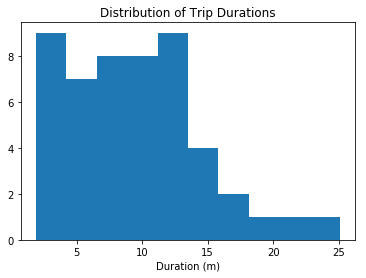

In [75]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [95]:
import matplotlib.pyplot as plt

%matplotlib inline 

def Histo_duration(city_file):
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        data = []
        for row in reader:
            x = round(float(row['duration']), 1)
            data.append(x)


    plt.hist(data)
    #plt.axis([0, 60, 0, 50000])
    plt.title('Distribution of Trip Durations')
    plt.xlabel('Duration (m)')
    plt.show()

In Washington


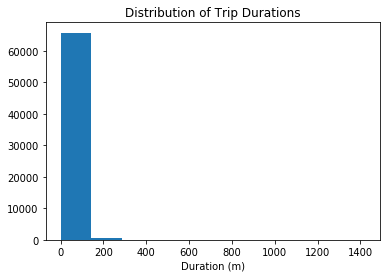

None
In Chicago


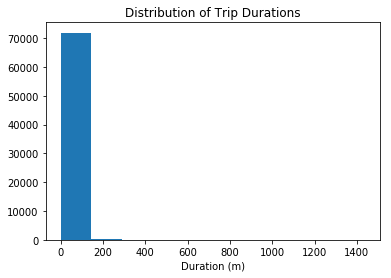

None
In NYC


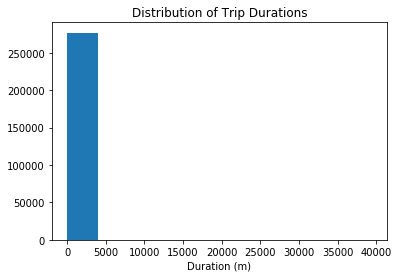

None


In [96]:
cities = {'Washington':'./data/Washington-2016-Summary.csv', 
          'Chicago':'./data/Chicago-2016-Summary.csv',
          'NYC':'./data/NYC-2016-Summary.csv'}

for city in cities:
    city_file = cities[city] 
    print("In", city)
    print (Histo_duration(city_file))


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 
In Washington
Peak for casual customers is between approximately 15-20 min and peak for Subscribers is between 5-10 min. Both distributions are right skewed.
In Chicago
Peak for casual customers is between approximately 15-20 min and peak for Subscribers is between 5-10 min. Both distributions are right skewed.
In NYC
Peak for casual customers is between approximately 15-20 min and peak for Subscribers is between 5-10 min. Both distributions are right skewed.


In [136]:
## Use this and additional cells to answer Question 5. ##
import matplotlib.pyplot as plt

%matplotlib inline 

def Histo_duration_Customers_adjusted(city_file):
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        data = []
        for row in reader:
            y = row['user_type']
            x = round(float(row['duration']), 1)
            
            if y=='Customer' and x < 75:
                data.append(x)


    plt.hist(data, normed=True, bins=15)
    #plt.axis([0, 75, 0, 50000])
    plt.title('Distribution of Trip Durations for Customers')
    plt.xlabel('Duration (m)')
    plt.show()


In [137]:
import matplotlib.pyplot as plt

%matplotlib inline 

def Histo_duration_Subscribers_adjusted(city_file):
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        data = []
        for row in reader:
            y = row['user_type']
            x = round(float(row['duration']), 1)
            
            if y=='Subscriber' and x < 75:
                data.append(x)


    plt.hist(data, normed=True, bins=15)
    #plt.axis([0, 75, 0, 50000])
    plt.title('Distribution of Trip Durations for Subscribers')
    plt.xlabel('Duration (m)')
    plt.show()

In Washington


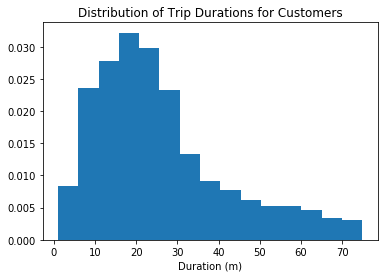

None


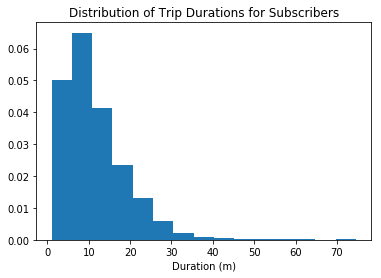

None
In Chicago


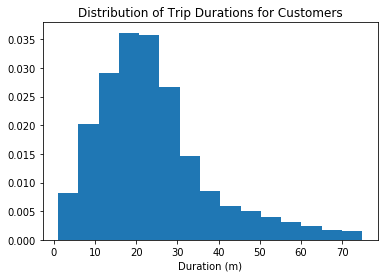

None


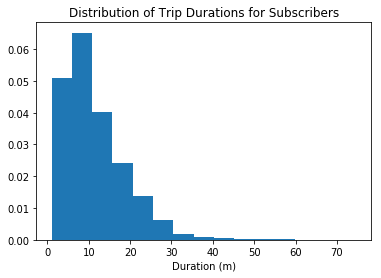

None
In NYC


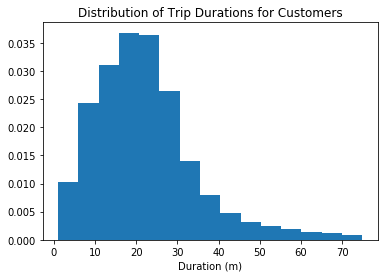

None


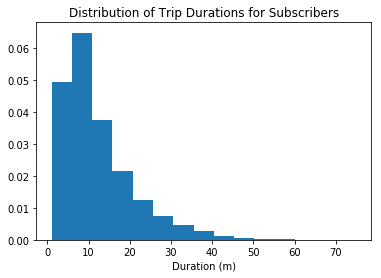

None


In [138]:
cities = {'Washington':'./data/Washington-2016-Summary.csv', 
          'Chicago':'./data/Chicago-2016-Summary.csv',
          'NYC':'./data/NYC-2016-Summary.csv'}

for city in cities:
    city_file = cities[city] 
    print("In", city)
    print (Histo_duration_Customers_adjusted(city_file))
    print (Histo_duration_Subscribers_adjusted(city_file))

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 
I wanted to investigate the most used sites at each city. I found that the code running time is too long so I only investigated Washington.
Identifying the most used sites will help in allocating resources to that site. 
Nevertheless, I used pie charts to compare between the activities of Customers and Subscribers during workdays. I can conclude that the Subscribers mostly use the service to go to and return from work as their peaks of use are in the morning rush hours and in the evening rush hours.
While for the Customers, they significantly use the service more during working hours. This might indicate that they are using the service for creational activities for example.


In [55]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##

# Which location is used the most as a starting point?
# Indeed is I could plot this on a map it will be even great
# I believe it is a good business decision to know where the customers cluster. 
# So I would like to find out where is the most used starting and ending points.
# I will use the original documents to fins out.

import csv

def Starting_point(filename):
    # following steps described above for opening the data source file
    
    city = filename.split('-')[0].split('/')[-1]
    
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        starting_points = []
        Starting_points_count = {}
        
        if city == 'NYC':
            for row in reader:
                Y = row['start station name']
                starting_points.append(Y)
                                
        elif city == 'Chicago':
            for row in reader:
                Y = row['from_station_name']
                starting_points.append(Y)
        
        elif city == 'Washington':
            for row in reader:
                Y = row['Start station']
                starting_points.append(Y)
        
        for point in starting_points:
            point_counts= starting_points.count(point)
            Starting_points_count[point] = point_counts
        
        return max(Starting_points_count, key=Starting_points_count.get)
#reference: https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary

In [56]:
#just to save run time I will only perform the analysis for Washington
data_files = ['./data/Washington-CapitalBikeshare-2016.csv']

for city_file in data_files:
    city = city_file.split('-')[0].split('/')[-1]
    print("In", city)
    print("The most used point as a starting point is:")
    print (Starting_point(city_file))
   

In Washington
The most used point as a starting point is:
Columbus Circle / Union Station


In [41]:
import csv

def Ending_point(filename):
    # following steps described above for opening the data source file
    
    city = filename.split('-')[0].split('/')[-1]
    
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        ending_points = []
        ending_points_count = {}
        
        if city == 'NYC':
            for row in reader:
                Y = row['end station name']
                ending_points.append(Y)
            
        elif city == 'Chicago':
            for row in reader:
                Y = row['to_station_name']
                ending_points.append(Y)  
        
        elif city == 'Washington':
            for row in reader:
                Y = row['End station']
                ending_points.append(Y)
        
        for point in ending_points:
            point_counts= ending_points.count(point)
            ending_points_count[point] = point_counts
            
        
        return max(ending_points_count, key=ending_points_count.get)


In [42]:
#just to save run time I will only perform the analysis for Washington
data_files = ['./data/Washington-CapitalBikeshare-2016.csv']

for city_file in data_files:
    city = city_file.split('-')[0].split('/')[-1]
    print("In", city)
    print("The most used point as an ending point is:")
    print (Ending_point(city_file))

In Washington
The most used point as an ending point is:
Columbus Circle / Union Station


In [53]:

#Which location is used the most as an ending point 

#The disctribution in day use among Subscribers and Customers as a pie chart
import csv
import matplotlib.pyplot as plt


def Daily_use_workdays(filename):
    # this function will generate pie charts for the use of the service in week days
    
    city = filename.split('-')[0].split('/')[-1]
    
    with open(city_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        Hour_of_use_workdays_Subscriber = []
        Hour_of_use_workdays_Customer = []
        
        if city == 'NYC':
            for row in reader:
                datum = row['starttime']
                Client_type = row['usertype']
                hour = int(datetime.strptime( datum, "%m/%d/%Y %H:%M:%S" ).strftime('%H'))
                day_of_week = datetime.strptime( datum, "%m/%d/%Y %H:%M:%S" ).strftime('%A')
                if Client_type == 'Subscriber' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                        Hour_of_use_workdays_Subscriber.append(hour)
                elif Client_type == 'Customer' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                    Hour_of_use_workdays_Customer.append(hour)
            
        elif city == 'Chicago':
            for row in reader:
                datum = row['starttime']
                Client_type = row['usertype']
                hour = int(datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%H'))
                day_of_week = datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%A')
                if Client_type == 'Subscriber' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                        Hour_of_use_workdays_Subscriber.append(hour)
                elif Client_type == 'Customer' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                    Hour_of_use_workdays_Customer.append(hour)
        
        elif city == 'Washington':
            for row in reader:
                datum = row['Start date']
                Client_type = row['Member Type']
                hour = int(datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%H'))
                day_of_week = datetime.strptime( datum, "%m/%d/%Y %H:%M" ).strftime('%A')
                if Client_type == 'Registered' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                        Hour_of_use_workdays_Subscriber.append(hour)
                elif Client_type == 'Casual' and (day_of_week !='Saturday' or day_of_week != 'Sunday'):
                    Hour_of_use_workdays_Customer.append(hour)

        
        #Subscribers data
        Early_Morning_Subscriber = 0 #for use before 7Am
        Morning_Rushhour_Subscriber = 0 #for use between 7-9Am
        During_workinghours_Subscriber = 0 #for use between 9-16
        Late_Rushhour_Subscriber = 0 #for use between 16-18
        Night_Subscriber = 0 #for use after 18
        
        #Customers data
        Early_Morning_Customer = 0 #for use before 7Am
        Morning_Rushhour_Customer = 0 #for use between 7-9Am
        During_workinghours_Customer = 0 #for use between 9-16
        Late_Rushhour_Customer = 0 #for use between 16-18
        Night_Customer = 0 #for use after 18
        
        
        
        for point in Hour_of_use_workdays_Subscriber:
            if int(point) < 7 :
                Early_Morning_Subscriber += 1
            elif 7 <= int(point) <= 9:
                Morning_Rushhour_Subscriber +=1
            elif 9 < int(point) < 16:
                During_workinghours_Subscriber +=1
            elif 16 <= int(point) <= 18:
                Late_Rushhour_Subscriber += 1
            elif int(point) > 18 :
                Night_Subscriber += 1
        
        for point in Hour_of_use_workdays_Customer:
            if int(point) < 7 :
                Early_Morning_Customer += 1
            elif 7 <= int(point) <= 9:
                Morning_Rushhour_Customer +=1
            elif 9 < int(point) < 16:
                During_workinghours_Customer +=1
            elif 16 <= int(point) <= 18:
                Late_Rushhour_Customer += 1
            elif int(point) > 18 :
                Night_Customer += 1

        
        # Pie Chart for Subscribers
        #Reference: https://pythonspot.com/matplotlib-pie-chart/
        # Data to plot
        labels = 'Early_Morning', 'Morning_Rushhour', 'During_workinghours', 'Late_Rushhour', 'Night'
        sizes = [Early_Morning_Subscriber, Morning_Rushhour_Subscriber, During_workinghours_Subscriber, Late_Rushhour_Subscriber, Night_Subscriber]
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gray']
        

        # Plot
        plt.pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)

        plt.axis('equal')
        plt.show()
        print('Subscribers')
   
        # Pie Chart for Customers
        #Reference: https://pythonspot.com/matplotlib-pie-chart/
        # Data to plot
        labels = 'Early_Morning', 'Morning_Rushhour', 'During_workinghours', 'Late_Rushhour', 'Night'
        sizes = [Early_Morning_Customer, Morning_Rushhour_Customer, During_workinghours_Customer, Late_Rushhour_Customer, Night_Customer]
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gray']
        

        # Plot
        plt.pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)

        plt.axis('equal')
        plt.show()
        print('Customers')
   

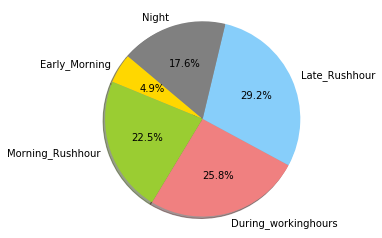

Subscribers


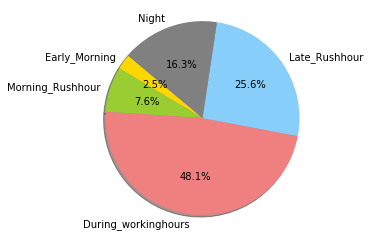

Customers
None
Pie Charts representing Subscribers daily use in weekdays in Washington


In [54]:
#just to save run time I will only perform the analysis for Washington
data_files = ['./data/Washington-CapitalBikeshare-2016.csv']

for city_file in data_files:
    print (Daily_use_workdays(city_file))
    print("Pie Charts representing Subscribers daily use in weekdays in Washington")

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 

I come from the medical research arena and I will stay in my example there.
I believe that the data science and the techniques I learned so far are very useful for the public health field. For instance, let us assume that there is a „on the counter“ drug that is used for a specific medical condition. You do not need a prescription to get such kinds of drugs. Yet, the pharmacies must track the sales on their system. Using the techniques of data science I can study the epidemiology of the medical condition of interest (for instance flu and the drug: Flurest). I can know where the drug is been sold the most. Or if there is a sudden increase in the rate the drug is being sold at. Accordingly, I can predict outbreaks for the benefit of public health.



> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0